## try the FLB picture before resample

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
folder_path = '../../datasets/rawdata'
prob_folder_path = '../../datasets/probability'
FLB_folder_path = '../../datasets/FLB'
resam_folder_path = '../../datasets/resample_by_min'
games = { 'baseball':'/baseball/mlb','basketball':'/basketball/nba','football':'/football/nfl',
            'iceball': '/iceball/nhl','soccer_champion':'/soccer/champ_league','scoccer_england':'/soccer/epl',
            'soccer_major':'/soccer/majorleague'}
# folder name is games, result name is games_results.csv

games_list = ['baseball','basketball','football','iceball']
soccer_list = ['soccer_champion','scoccer_england','soccer_major']

### summary probability and results

In [44]:
#  other games
for game_name in games_list:
    print(game_name)
    results_df = pd.read_csv(folder_path + games[game_name] + '_results.csv').set_index('Unnamed: 0')
    # count No. win
    count_df = pd.DataFrame()
    index_list = [int(i[:-4]) for i in os.listdir(prob_folder_path + games[game_name])]
    for index in index_list:
        # iter line get index find series and give result
        HOME_WIN = False
        if results_df.loc[index,'home_score']> results_df.loc[index,'away_score']:
            HOME_WIN = True
        series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
        series_df.loc[:,'home'] = [series_df.iloc[-1,-1] for i in range(len(series_df))]
        series_df['HOME_WIN'] = HOME_WIN
        count_df = pd.concat([count_df,series_df],ignore_index=True)
    count_df.to_csv(FLB_folder_path+'/summary/'+game_name+'.csv')

baseball
basketball
football
iceball


In [53]:
# soccer
for odds_type in ['home','away','draw']:
    count_df = pd.DataFrame()
    for game_name in soccer_list:
        print(game_name)
        results_df = pd.read_csv(folder_path + games[game_name] + '_results.csv').set_index('Unnamed: 0')
        # count No. win
        index_list = [int(i[:-4]) for i in os.listdir(prob_folder_path + games[game_name])]
        
        if odds_type == 'home':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score']> results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'home'] = [series_df.loc[series_df.index[-1],'home'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,series_df[['home','HOME_WIN']]],ignore_index=True)
                
        if odds_type == 'away':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score']< results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'away'] = [series_df.loc[series_df.index[-1],'away'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,series_df[['away','HOME_WIN']]],ignore_index=True)
                
                
        if odds_type == 'draw':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score'] == results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'draw'] = [series_df.loc[series_df.index[-1],'draw'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,series_df[['draw','HOME_WIN']]],ignore_index=True)
                
    count_df.to_csv(FLB_folder_path+'/summary/soccer_'+odds_type+'.csv')

soccer_champion
scoccer_england
soccer_major
soccer_champion
scoccer_england
soccer_major
soccer_champion
scoccer_england
soccer_major


In [57]:
# soccer all
count_df = pd.DataFrame()
for odds_type in ['home','away','draw']:
    df = pd.read_csv(FLB_folder_path+'/summary/soccer_'+odds_type+'.csv').set_index('Unnamed: 0')
    if odds_type == 'away':
        df = df.rename(index=str,columns={'away':'home'})
    if odds_type == 'draw':
        df = df.rename(index=str,columns={'draw':'home'})    
    count_df = pd.concat([count_df,df],ignore_index=True)
count_df.to_csv(FLB_folder_path+'/summary/soccer.csv')   

In [ ]:
# soccer by games
for game_name in soccer_list:
    count_df = pd.DataFrame()
    print(game_name)
    for odds_type in ['home','away','draw']:
        results_df = pd.read_csv(folder_path + games[game_name] + '_results.csv').set_index('Unnamed: 0')
        # count No. win
        index_list = [int(i[:-4]) for i in os.listdir(prob_folder_path + games[game_name])]
        
        if odds_type == 'home':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score']> results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'home'] = [series_df.loc[series_df.index[-1],'home'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,series_df[['home','HOME_WIN']]],ignore_index=True)
                
        if odds_type == 'away':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score']< results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'away'] = [series_df.loc[series_df.index[-1],'away'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,
                                      series_df[['away','HOME_WIN']].rename(index=str,
                                                                            columns={'away':'home'})],ignore_index=True)
                
                
        if odds_type == 'draw':
            for index in index_list:
                # iter line get index find series and give result
                HOME_WIN = False
                if results_df.loc[index,'home_score'] == results_df.loc[index,'away_score']:
                    HOME_WIN = True
                series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time')
                series_df.loc[:,'draw'] = [series_df.loc[series_df.index[-1],'draw'] for i in range(len(series_df))]
                series_df['HOME_WIN'] = HOME_WIN
                count_df = pd.concat([count_df,
                                      series_df[['draw','HOME_WIN']].rename(index=str,
                                                                            columns={'draw':'home'})],ignore_index=True)
                
    count_df.to_csv(FLB_folder_path+'/summary/'+game_name+'.csv')

soccer_champion
scoccer_england
soccer_major


### Using hist to draw scatter

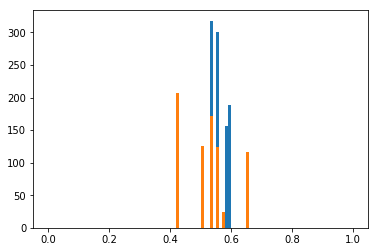

In [42]:
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
bins_num=100
counts, middiam, objs = plt.hist(count_df['home'],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True]['home'],range=(0,1),bins=bins_num)

# plt.scatter(x=middiam[:100],y=win_counts/counts)

C:\Users\surface\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


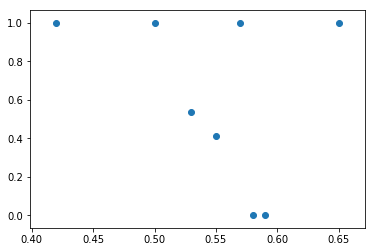

In [43]:
plt.scatter(x=middiam[:100],y=win_counts/counts)

## only use last value
### 使用最终odds ： 假设参与该赌局的所有人的平均结果。

### count by games except soccer

Object `matplotlib.axes._subplots.AxesSubplot` not found.


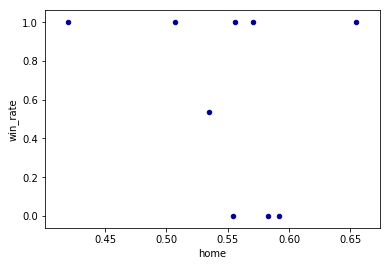

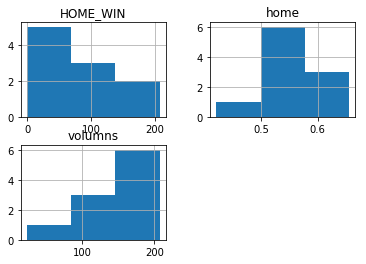

In [14]:
# only have home odds series
no_float = 3
game_name = 'baseball'
results_df = pd.read_csv(folder_path + games[game_name] + '_results.csv').set_index('Unnamed: 0')
count_df = pd.DataFrame(columns=['home'])
index_list = [int(i[:-4]) for i in os.listdir(prob_folder_path + games[game_name])]

for index in index_list[:10]:
    series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time') 
    if len(series_df) < 1:
        continue
    count_df.loc[index] = series_df.iloc[-1,:].apply(lambda x :round(x,no_float))
    count_df.loc[index,'volumns'] = len(series_df)
results_df = results_df.join(count_df,how='right')


for index in results_df.index.tolist():
    HOME_WIN = 0
    if results_df.loc[index,'home_score']> results_df.loc[index,'away_score']:
        HOME_WIN = 1
    results_df.loc[index,'HOME_WIN'] = HOME_WIN * results_df.loc[index,'volumns']
# groupby count
count_df = results_df[['home','HOME_WIN','volumns']]
win_no = count_df.groupby(['home']).sum().rename(index=str, columns={"HOME_WIN": "WIN_NO"})
win_no['win_rate'] = win_no['WIN_NO'] / win_no['volumns']
win_no = win_no.reset_index().applymap(lambda x: float(x))
win_no.plot.scatter(x='home',y='win_rate',c='DarkBlue')
hist = count_df.hist(bins=3)


### count by games : soccer (three leagues)

In [ ]:
no_float = 2
game_name = 'baseball'
results_df = pd.read_csv(folder_path + games[game_name] + '_results.csv').set_index('Unnamed: 0')

# count No. win

index_list = [int(i[:-4]) for i in os.listdir(prob_folder_path + games[game_name])]

columns_list = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index_list[0])+'.csv').set_index('time') \
                .columns.tolist()
count_df = pd.DataFrame(columns=columns_list)
for index in index_list:
    series_df = pd.read_csv(prob_folder_path + games[game_name]+'/'+str(index)+'.csv').set_index('time') 
    if len(series_df) < 1:
        continue
    count_df.loc[index] = series_df.iloc[-1,:].apply(lambda x :round(x,no_float))
    count_df.loc[index,'volumns'] = volumns = len(series_df)
results_df = results_df.join(count_df,how='right')

for contact in columns_list:
    if contact == 'home':
        for index in results_df.index.tolist():
            HOME_WIN = 0
            if results_df.loc[index,'home_score']> results_df.loc[index,'away_score']:
                HOME_WIN = 1
            results_df.loc[index,'HOME_WIN'] = HOME_WIN * results_df.loc[index,'volumns']
        # groupby count
        count_df = results_df[['home','HOME_WIN','volumns']]
        win_no = count_df.groupby(['home']).sum().rename(index=str, columns={"HOME_WIN": "WIN_NO"})
#         total_no = count_df.groupby(['home']).count().rename(index=str, columns={"HOME_WIN": "TOTAL_NO"})
        win_no['win_rate'] = win_no['WIN_NO'] / win_no['volumns']
        win_no = win_no.reset_index().applymap(lambda x: float(x))
win_no.plot.scatter(x='home',y='win_rate',c='DarkBlue')

上文中的缺陷： 数据量太少，home away equal 分开。